/var/folders/hg/mt9c8y8x289f12jsw8tz1q_40000gn/T/ipykernel_1689/2516229296.py:36: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,2

      scorer DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000  \
0  bodyparts                                                hip        
1     coords                                                  x        
2          0                                 383.49151611328125        
3          1                                 383.49151611328125        
4          2                                 383.49151611328125        

  DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000.1  \
0                                                hip          
1                                                  y          
2                                   333.432373046875          
3                                     333.8154296875          
4                                    333.88232421875          

  DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000.2  \
0                                                hip          
1                                         likelihood          

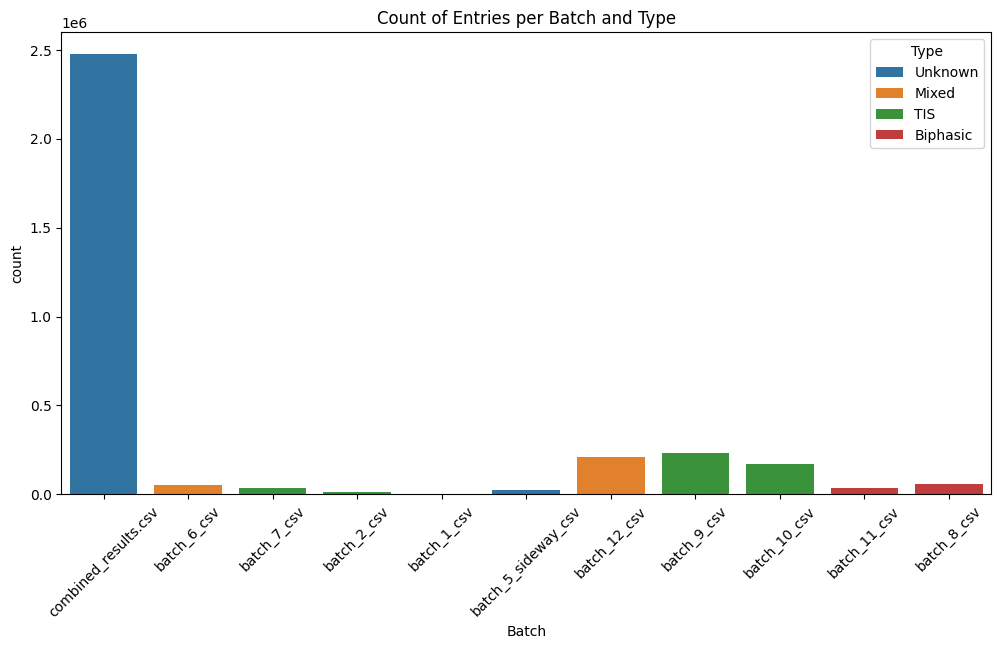

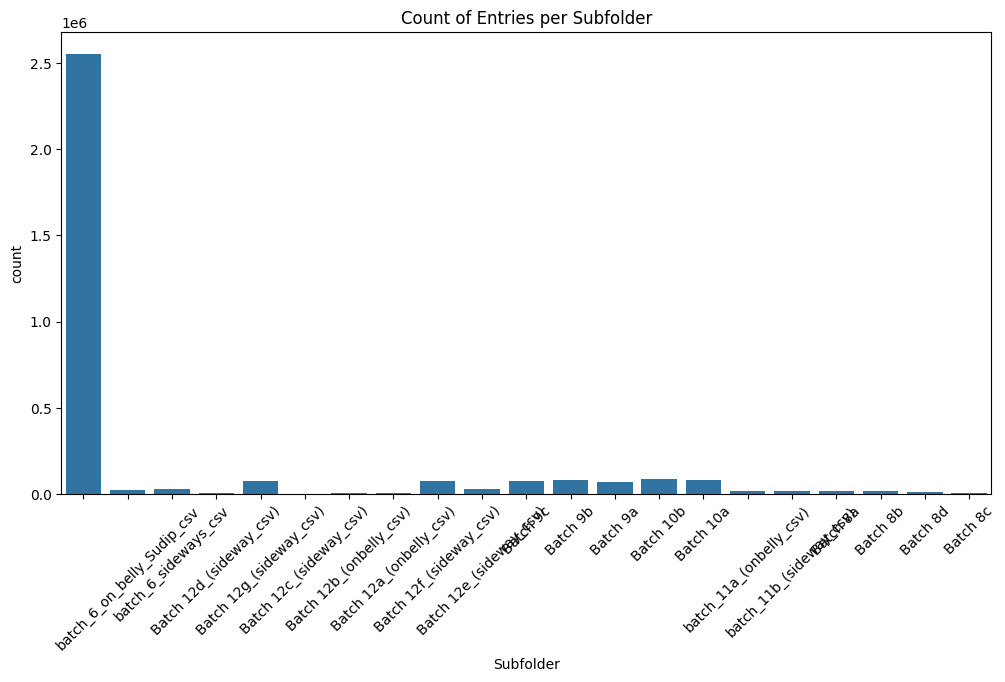

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change the directory
base_dir = '/Users/joshwoah/Documents/University of Toronto/Postdoc Research/GitHub Postdoc/After tracking results'
os.chdir(base_dir)

# Define the batch details
batch_details = {
    'batch_1_csv': {'Type': 'Biphasic', 'Details': 'Frequency parameters, 1 graph, 4 clusters'},
    'batch_2_csv': {'Type': 'TIS', 'Details': 'Frequency parameters, use 2, 2-001, -002, -003-kHz-continuous videos only, 1 graph, 4 clusters'},
    'batch_3_csv': {'Type': 'Biphasic', 'Details': 'Electrode Locations, channel 1ab vs channel 6ab, 4 graphs, 2 clusters each'},
    'batch_4_csv': {'Type': 'TIS', 'Details': 'Electrode Locations, 1 graph, 3 clusters'},
    'batch_5_csv': {'Type': 'Unknown', 'Details': 'Skip for now'},
    'batch_6_csv': {'Type': 'Mixed', 'Details': 'Contains TIS and Biphasic configurations'},
    'batch_7_csv': {'Type': 'TIS', 'Details': 'Electrode Locations (sweep), 1 graph, 31 clusters'},
    'batch_8_csv': {'Type': 'Biphasic', 'Details': 'Contains multiple sub-batches'},
    'batch_9_csv': {'Type': 'TIS', 'Details': 'Contains multiple sub-batches'},
    'batch_10_csv': {'Type': 'TIS', 'Details': 'Contains multiple sub-batches'},
    'batch_11_csv': {'Type': 'Biphasic', 'Details': 'Contains multiple sub-batches'},
    'batch_12_csv': {'Type': 'Mixed', 'Details': 'Contains TIS and Biphasic configurations'}
}

# List all CSV files in the directory and subdirectories
csv_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Load all CSV files into a list of DataFrames with additional columns for batch, subfolder, and file names
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    relative_path = os.path.relpath(file, base_dir)
    parts = relative_path.split(os.sep)
    batch = parts[0]
    subfolder = parts[1] if len(parts) > 2 else ''
    filename = os.path.basename(file)
    df['Batch'] = batch
    df['Subfolder'] = subfolder
    df['Filename'] = filename
    df['Type'] = batch_details.get(batch, {}).get('Type', 'Unknown')
    df['Details'] = batch_details.get(batch, {}).get('Details', 'No details available')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())

# # Save the combined DataFrame to a CSV file
# output_file = os.path.join(base_dir, 'combined_results.csv')
# combined_df.to_csv(output_file, index=False)

# Example visualization: Count plot of entries per batch and type
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Batch', hue='Type')
plt.title('Count of Entries per Batch and Type')
plt.xticks(rotation=45)
plt.show()

# Example visualization: Count plot of entries per subfolder
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Subfolder')
plt.title('Count of Entries per Subfolder')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Display the first few rows of combined_df
print(combined_df.head())

      scorer DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000  \
0  bodyparts                                                hip        
1     coords                                                  x        
2          0                                 383.49151611328125        
3          1                                 383.49151611328125        
4          2                                 383.49151611328125        

  DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000.1  \
0                                                hip          
1                                                  y          
2                                   333.432373046875          
3                                     333.8154296875          
4                                    333.88232421875          

  DLC_resnet50_6th_batch_10_keypointsJul11shuffle3_250000.2  \
0                                                hip          
1                                         likelihood          

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Tuple

# Change the directory
base_dir = '/Users/joshwoah/Documents/University of Toronto/Postdoc Research/GitHub Postdoc/After tracking results'
os.chdir(base_dir)

# List all CSV files in the directory and subdirectories
csv_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

class DataProcessor:
    def __init__(self, base_dir: str):
        self.base_dir = base_dir
        self.new_column_names = [
            'Time', 'Hip x', 'Hip y', 'Hip likelihood',
            'Knee x', 'Knee y', 'Knee likelihood',
            'Ankle x', 'Ankle y', 'Ankle likelihood',
            'Heel (ventral) x', 'Heel (ventral) y', 'Heel (ventral) likelihood',
            'Instep (dorsal) x', 'Instep (dorsal) y', 'Instep (dorsal) likelihood',
            'Toe 1 (Proximal Thumb) x', 'Toe 1 (Proximal Thumb) y', 'Toe 1 (Proximal Thumb) likelihood',
            'Toe2 x', 'Toe2 y', 'Toe2 likelihood',
            'Toe 3 (Middle) x', 'Toe 3 (Middle) y', 'Toe 3 (Middle) likelihood',
            'Toe4 x', 'Toe4 y', 'Toe4 likelihood',
            'Toe 5 (Distal Pinky) x', 'Toe 5 (Distal Pinky) y', 'Toe 5 (Distal Pinky) likelihood'
        ]
        
    def process_file(self, file_path: str) -> pd.DataFrame:
        """Process individual CSV file with standardized column names and normalization."""
        df_header = pd.read_csv(file_path, nrows=0)
        if list(df_header.columns) != self.new_column_names:
            df = pd.read_csv(file_path, skiprows=3, header=None)
            df.columns = self.new_column_names
        else:
            df = pd.read_csv(file_path)
        
        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)

        # Remove rows with zero values in coordinate columns
        coordinate_columns = [col for col in df.columns if ' x' in col or ' y' in col]
        df = df[(df[coordinate_columns] != 0).all(axis=1)]

        # Normalize coordinates
        scaler = MinMaxScaler()
        df[coordinate_columns] = scaler.fit_transform(df[coordinate_columns])
        
        return df

    def get_batch_info(self, filename: str) -> Dict:
        """Extract batch-specific information from filename."""
        info = {'type': None, 'frequency': None, 'configuration': None, 'trial': None}
        
        # Batch 1 processing
        if '9_kSa' in filename:
            info.update({'type': 'Biphasic', 'frequency': 42})
        elif '30_kSa' in filename:
            info.update({'type': 'Biphasic', 'frequency': 143})
        elif '90_kSa' in filename:
            info.update({'type': 'Biphasic', 'frequency': 430})
        elif '120_kSa' in filename:
            info.update({'type': 'Biphasic', 'frequency': 577})
            
        # Batch 2 processing
        elif '2-and-2-' in filename:
            info['type'] = 'TIS'
            if '001-kHz' in filename:
                info['frequency'] = 1
            elif '002-kHz' in filename:
                info['frequency'] = 2
            elif '003-kHz' in filename:
                info['frequency'] = 3
            else:
                info['frequency'] = 0
                
        # Batch 3 processing
        elif 'Biphasic_' in filename and 'channel' in filename:
            info['type'] = 'Biphasic'
            if '30_Hz' in filename:
                info['frequency'] = 30
            elif '60_Hz' in filename:
                info['frequency'] = 60
            elif '90_Hz' in filename:
                info['frequency'] = 90
            elif '120_Hz' in filename:
                info['frequency'] = 120
            
            if 'channel_1' in filename:
                info['configuration'] = '1'
            elif 'channel_6' in filename:
                info['configuration'] = '6'
                
            if '_a' in filename:
                info['trial'] = 'a'
            elif '_b' in filename:
                info['trial'] = 'b'
                
        # Batch 4 processing
        elif 'TIS E' in filename:
            info['type'] = 'TIS'
            if 'E3_34 and E14_46' in filename:
                info['configuration'] = 'config_1'
            elif 'E3_34 and E27_58' in filename:
                info['configuration'] = 'config_2'
            elif 'E14_46 and E27_58' in filename:
                info['configuration'] = 'config_3'
                
            # Extract trial number from parentheses
            if '(1)' in filename:
                info['trial'] = '1'
            elif '(2)' in filename:
                info['trial'] = '2'
            elif '(3)' in filename:
                info['trial'] = '3'
        
        return info

    def calculate_velocity(self, df: pd.DataFrame) -> pd.DataFrame:
        """Calculate velocity for all tracked points."""
        time_diff = df['Time'].diff().fillna(0)
        x_columns = [col for col in df.columns if ' x' in col]
        y_columns = [col for col in df.columns if ' y' in col]

        velocity_df = pd.DataFrame(index=df.index)

        for x_col, y_col in zip(x_columns, y_columns):
            delta_x = df[x_col].diff().fillna(0)
            delta_y = df[y_col].diff().fillna(0)
            velocity = np.sqrt(delta_x**2 + delta_y**2) / time_diff
            velocity_df[f'velocity_{x_col.strip(" x")}'] = velocity

        velocity_df.dropna(inplace=True)
        velocity_df.reset_index(drop=True, inplace=True)
        velocity_df.iloc[0] = 0
        
        return velocity_df

def process_batch(self, batch_num: int) -> Tuple[Dict[str, pd.DataFrame], Dict[str, pd.DataFrame]]:
    """Process all files in a specific batch and include folder details."""
    batch_path = os.path.join(self.base_dir, f'batch_{batch_num}_csv')
    if not os.path.exists(batch_path) or batch_num == 5:
        return {}, {}

    processed_dfs = {}
    velocity_dfs = {}

    for root, _, files in os.walk(batch_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                
                # Extract folder details from the relative path
                relative_path = os.path.relpath(file_path, self.base_dir)
                parts = relative_path.split(os.sep)
                batch_folder = parts[0] if parts else ''
                subfolder = parts[1] if len(parts) > 2 else ''  # adjust if needed
                
                # Get batch-specific information from the filename
                info = self.get_batch_info(file, batch_num)
                if not info['type']:
                    continue

                # Process the CSV file
                df = self.process_file(file_path)
                
                # Add folder information as new columns
                df['Batch_Folder'] = batch_folder
                df['Subfolder'] = subfolder
                df['Filename'] = file

                # Create unique key for the DataFrame using info and folder details
                key_parts = [f"batch{batch_num}", info['type']]
                if info.get('frequency'):
                    key_parts.append(str(info['frequency']))
                if info.get('configuration'):
                    key_parts.append(f"config{info['configuration']}")
                if info.get('trial'):
                    key_parts.append(f"trial{info['trial']}")
                if batch_num > 10 and 'position' in info:
                    key_parts.append(info['position'])
                key = '_'.join(key_parts)
                
                processed_dfs[key] = df

                # (Optional) Process velocity data here similarly and store in velocity_dfs

    return processed_dfs, velocity_dfs

def analyze_silhouette_scores(self, data: pd.DataFrame, title: str) -> None:
    """Analyze and plot silhouette scores for clustering."""
    range_n_clusters = list(range(2, 11))
    silhouette_avg_scores = []

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
    plt.title(f'Silhouette Scores for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

def main():
    base_dir = '/Users/joshwoah/Documents/University of Toronto/Postdoc Research/GitHub Postdoc/After tracking results'
    processor = DataProcessor(base_dir)
    
    # Process each batch
    all_processed_dfs = {}
    all_velocity_dfs = {}
    
    for batch_num in range(1, 13):
        if batch_num != 5:  # Skip batch 5
            processed_dfs, velocity_dfs = processor.process_batch(batch_num)
            all_processed_dfs.update(processed_dfs)
            all_velocity_dfs.update(velocity_dfs)
    
    # Example analysis for each batch
    for key in all_processed_dfs.keys():
        print(f"\nAnalyzing {key}")
        coordinate_columns = [col for col in all_processed_dfs[key].columns if ' x' in col or ' y' in col]
        data_for_clustering = all_processed_dfs[key][coordinate_columns]
        processor.analyze_silhouette_scores(data_for_clustering, key)

if __name__ == "__main__":
    main()

AttributeError: 'DataProcessor' object has no attribute 'process_batch'

In [14]:
class DataProcessor:
    def __init__(self, base_dir):
        self.base_dir = base_dir
        self.batch_details = self._initialize_batch_details()

    def _initialize_batch_details(self) -> Dict:
        # Initialize batch details here
        return {
            'batch_1_csv': {'Type': 'Biphasic', 'Details': 'Frequency parameters, 1 graph, 4 clusters'},
            'batch_2_csv': {'Type': 'TIS', 'Details': 'Frequency parameters, use 2, 2-001, -002, -003-kHz-continuous videos only, 1 graph, 4 clusters'},
            'batch_3_csv': {'Type': 'Biphasic', 'Details': 'Electrode Locations, channel 1ab vs channel 6ab, 4 graphs, 2 clusters each'},
            'batch_4_csv': {'Type': 'TIS', 'Details': 'Electrode Locations, 1 graph, 3 clusters'},
            'batch_5_csv': {'Type': 'Unknown', 'Details': 'Skip for now'},
            'batch_6_csv': {'Type': 'Mixed', 'Details': 'Contains TIS and Biphasic configurations'},
            'batch_7_csv': {'Type': 'TIS', 'Details': 'Electrode Locations (sweep), 1 graph, 31 clusters'},
            'batch_8_csv': {'Type': 'Biphasic', 'Details': 'Contains multiple sub-batches'},
            'batch_9_csv': {'Type': 'TIS', 'Details': 'Contains multiple sub-batches'},
            'batch_10_csv': {'Type': 'TIS', 'Details': 'Contains multiple sub-batches'},
            'batch_11_csv': {'Type': 'Biphasic', 'Details': 'Contains multiple sub-batches'},
            'batch_12_csv': {'Type': 'Mixed', 'Details': 'Contains TIS and Biphasic configurations'}
        }

    def process_file(self, file_path: str) -> pd.DataFrame:
        # Process the file and return a DataFrame
        df = pd.read_csv(file_path)
        # Add any additional processing here
        return df

    def get_batch_info(self, filename: str, batch_num: int) -> Dict:
        # Extract batch-specific information from filename
        info = {'type': None, 'frequency': None, 'configuration': None, 'trial': None}
        # Add logic to extract information based on batch_num and filename
        return info

    def process_batch(self, batch_num: int) -> Tuple[Dict[str, pd.DataFrame], Dict[str, pd.DataFrame]]:
        """Process all files in a specific batch."""
        batch_path = os.path.join(self.base_dir, f'batch_{batch_num}_csv')
        if not os.path.exists(batch_path) or batch_num == 5:
            return {}, {}

        processed_dfs = {}
        velocity_dfs = {}

        for root, _, files in os.walk(batch_path):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    
                    # Get batch-specific information
                    info = self.get_batch_info(file, batch_num)
                    if not info['type']:
                        continue

                    # Process the file
                    df = self.process_file(file_path)
                    
                    # Create unique key for the DataFrame
                    key_parts = [f"batch{batch_num}", info['type']]
                    if info['frequency']:
                        key_parts.append(str(info['frequency']))
                    if info['configuration']:
                        key_parts.append(f"config{info['configuration']}")
                    if info['trial']:
                        key_parts.append(f"trial{info['trial']}")
                    if batch_num > 10 and 'position' in info:
                        key_parts.append(info['position'])
                    
                    key = '_'.join(key_parts)
                    
                    processed_dfs[key] = df

        return processed_dfs, velocity_dfs

# Example usage:
base_dir = '/Users/joshwoah/Documents/University of Toronto/Postdoc Research/GitHub Postdoc/After tracking results'
processor = DataProcessor(base_dir)
batch_num = 1
processed_dfs, velocity_dfs = processor.process_batch(batch_num)

In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Tuple

class DataProcessor:
    def __init__(self, base_dir: str):
        self.base_dir = base_dir
        self.new_column_names = [
            'Time', 'Hip x', 'Hip y', 'Hip likelihood',
            'Knee x', 'Knee y', 'Knee likelihood',
            'Ankle x', 'Ankle y', 'Ankle likelihood',
            'Heel (ventral) x', 'Heel (ventral) y', 'Heel (ventral) likelihood',
            'Instep (dorsal) x', 'Instep (dorsal) y', 'Instep (dorsal) likelihood',
            'Toe 1 (Proximal Thumb) x', 'Toe 1 (Proximal Thumb) y', 'Toe 1 (Proximal Thumb) likelihood',
            'Toe2 x', 'Toe2 y', 'Toe2 likelihood',
            'Toe 3 (Middle) x', 'Toe 3 (Middle) y', 'Toe 3 (Middle) likelihood',
            'Toe4 x', 'Toe4 y', 'Toe4 likelihood',
            'Toe 5 (Distal Pinky) x', 'Toe 5 (Distal Pinky) y', 'Toe 5 (Distal Pinky) likelihood'
        ]
        self.batch_details = self._initialize_batch_details()

    def _initialize_batch_details(self) -> Dict:
        """Initialize detailed batch information including cluster counts and graph requirements."""
        return {
            'batch_6_csv': {
                'Type': 'Mixed',
                'Details': 'TIS and Biphasic configurations',
                'SubBatches': {
                    'TIS': {
                        'Graphs': 1,
                        'Clusters': 2,
                        'Trials': {
                            'Config_A': range(45, 51),
                            'Config_B': range(51, 57)
                        }
                    },
                    'Biphasic': {
                        'Graphs': 1,
                        'Clusters': 2,
                        'Trials': {
                            'Config_C': range(33, 39),
                            'Config_D': range(39, 45)
                        }
                    }
                }
            },
            'batch_7_csv': {
                'Type': 'TIS',
                'Details': 'Electrode Locations (sweep)',
                'Graphs': 1,
                'Clusters': 31
            },
            'batch_8_csv': {
                'Type': 'Biphasic',
                'Details': 'Electrode Locations (sweep)',
                'SubBatches': {
                    'a': {'Graphs': 1, 'Clusters': 32},
                    'b': {'Graphs': 1, 'Clusters': [3, 6]},
                    'c': {'Graphs': 1, 'Clusters': [3, 6]},
                    'd': {'Graphs': 1, 'Clusters': [3, 6]}
                }
            },
            'batch_9_csv': {
                'Type': 'TIS',
                'Details': 'Electrode Locations (sweep)',
                'SubBatches': {
                    'a': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 540},
                    'b': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600},
                    'c': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600}
                }
            },
            'batch_10_csv': {
                'Type': 'TIS',
                'Details': 'Electrode Locations (sweep)',
                'SubBatches': {
                    'a': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600},
                    'b': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600}
                }
            },
            'batch_11_csv': {
                'Type': 'Biphasic',
                'Details': 'Electrode Locations (sweep)',
                'SubBatches': {
                    'onbelly': {'Graphs': 1, 'Clusters': 32},
                    'sideway': {'Graphs': 1, 'Clusters': 32}
                }
            },
            'batch_12_csv': {
                'Type': 'Mixed',
                'Details': 'Biphasic and TIS configurations',
                'SubBatches': {
                    'a_onbelly': {'Graphs': 1, 'Clusters': 25},
                    'b_onbelly': {'Graphs': 1, 'Clusters': 18},
                    'c_sideway': {'Graphs': 1, 'Clusters': 13},
                    'd_sideway': {
                        'BP': {'Graphs': 1, 'Clusters': 16},
                        'TL': {'Graphs': 1, 'Clusters': 16},
                        'TT': {'Graphs': 1, 'Clusters': 16}
                    },
                    'e_sideway': {
                        'IC_TT': {'Graphs': 1, 'Clusters': 16},
                        'AM_Biphasic': {'Graphs': 1, 'Clusters': 8},
                        'AM_Sine': {'Graphs': 1, 'Clusters': 8}
                    },
                    'f_sideway': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600},
                    'g_sideway': {'Graphs': 1, 'Clusters': 128, 'FrameInterval': 600}
                }
            }
        }
        
    def process_file(self, file_path: str) -> pd.DataFrame:
        """Process individual CSV file with standardized column names and normalization."""
        df_header = pd.read_csv(file_path, nrows=0)
        if list(df_header.columns) != self.new_column_names:
            df = pd.read_csv(file_path, skiprows=3, header=None)
            df.columns = self.new_column_names
        else:
            df = pd.read_csv(file_path)
        
        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)

        # Remove rows with zero values in coordinate columns
        coordinate_columns = [col for col in df.columns if ' x' in col or ' y' in col]
        df = df[(df[coordinate_columns] != 0).all(axis=1)]

        # Normalize coordinates
        scaler = MinMaxScaler()
        df[coordinate_columns] = scaler.fit_transform(df[coordinate_columns])
        
        return df

    def get_batch_info(self, filename: str, batch_num: int) -> Dict:
        """Extract batch-specific information from filename."""
        info = {'type': None, 'frequency': None, 'configuration': None, 'trial': None}
        
        if batch_num <= 5:
            # Existing batch processing logic (1-5)
            if '9_kSa' in filename:
                info.update({'type': 'Biphasic', 'frequency': 42})
            elif '30_kSa' in filename:
                info.update({'type': 'Biphasic', 'frequency': 143})
            elif '90_kSa' in filename:
                info.update({'type': 'Biphasic', 'frequency': 430})
            elif '120_kSa' in filename:
                info.update({'type': 'Biphasic', 'frequency': 577})
            elif '2-and-2-' in filename:
                info['type'] = 'TIS'
                if '001-kHz' in filename:
                    info['frequency'] = 1
                elif '002-kHz' in filename:
                    info['frequency'] = 2
                elif '003-kHz' in filename:
                    info['frequency'] = 3
                else:
                    info['frequency'] = 0
            elif 'Biphasic_' in filename and 'channel' in filename:
                info['type'] = 'Biphasic'
                if '30_Hz' in filename:
                    info['frequency'] = 30
                elif '60_Hz' in filename:
                    info['frequency'] = 60
                elif '90_Hz' in filename:
                    info['frequency'] = 90
                elif '120_Hz' in filename:
                    info['frequency'] = 120
                
                if 'channel_1' in filename:
                    info['configuration'] = '1'
                elif 'channel_6' in filename:
                    info['configuration'] = '6'
                    
                if '_a' in filename:
                    info['trial'] = 'a'
                elif '_b' in filename:
                    info['trial'] = 'b'
            elif 'TIS E' in filename:
                info['type'] = 'TIS'
                if 'E3_34 and E14_46' in filename:
                    info['configuration'] = 'config_1'
                elif 'E3_34 and E27_58' in filename:
                    info['configuration'] = 'config_2'
                elif 'E14_46 and E27_58' in filename:
                    info['configuration'] = 'config_3'
                    
                if '(1)' in filename:
                    info['trial'] = '1'
                elif '(2)' in filename:
                    info['trial'] = '2'
                elif '(3)' in filename:
                    info['trial'] = '3'
        else:
            # New batch processing logic (6-12)
            batch_info = self.batch_details.get(f'batch_{batch_num}_csv', {})
            info['type'] = batch_info.get('Type', 'Unknown')
            
            # Batch 6 specific processing
            if batch_num == 6:
                if 'TIS Configuration' in filename:
                    info['type'] = 'TIS'
                    info['configuration'] = 'A' if 'Configuration A' in filename else 'B'
                elif 'Biphasic Configuration' in filename:
                    info['type'] = 'Biphasic'
                    info['configuration'] = 'C' if 'Configuration C' in filename else 'D'
            
            # Batch 7 processing
            elif batch_num == 7:
                info['type'] = 'TIS'
                try:
                    info['configuration'] = str(int(filename.split('_')[0]))
                except:
                    pass
            
            # Batch 8 processing
            elif batch_num == 8:
                info['type'] = 'Biphasic'
                if 'MATLAB' in filename:
                    info['configuration'] = 'MATLAB'
                    if 'Trial' in filename:
                        info['trial'] = filename.split('Trial')[1][0]
                else:
                    try:
                        info['configuration'] = str(int(filename.split('_')[0]))
                    except:
                        pass
            
            # Batch 9-10 processing
            elif batch_num in [9, 10]:
                info['type'] = 'TIS'
                if '_99' in filename:
                    info['configuration'] = '1-99'
                elif '_100' in filename:
                    info['configuration'] = '100-128'
                
                if 'Sweep' in filename:
                    info['trial'] = filename.split('Sweep')[1][0]
            
            # Batch 11 processing
            elif batch_num == 11:
                info['type'] = 'Biphasic'
                info['configuration'] = 'belly' if 'onbelly' in filename else 'side'
            
            # Batch 12 processing
            elif batch_num == 12:
                subfolder = [x for x in filename.split(os.sep) if 'Batch_12' in x][0]
                if 'TIS' in filename:
                    info['type'] = 'TIS'
                else:
                    info['type'] = 'Biphasic'
                    if 'IC' in filename:
                        info['configuration'] = 'IC'
                    elif 'MATLAB' in filename:
                        info['configuration'] = 'MATLAB'
                
                info['position'] = 'belly' if 'onbelly' in subfolder else 'side'

        return info

    def calculate_velocity(self, df: pd.DataFrame) -> pd.DataFrame:
        """Calculate velocity for all tracked points."""
        time_diff = df['Time'].diff().fillna(0)
        x_columns = [col for col in df.columns if ' x' in col]
        y_columns = [col for col in df.columns if ' y' in col]

        velocity_df = pd.DataFrame(index=df.index)

        for x_col, y_col in zip(x_columns, y_columns):
            delta_x = df[x_col].diff().fillna(0)
            delta_y = df[y_col].diff().fillna(0)
            velocity = np.sqrt(delta_x**2 + delta_y**2) / time_diff
            velocity_df[f'velocity_{x_col.strip(" x")}'] = velocity

        velocity_df.dropna(inplace=True)
        velocity_df.reset_index(drop=True, inplace=True)
        velocity_df.iloc[0] = 0
        
        return velocity_df

    def process_batch(self, batch_num: int) -> Tuple[Dict[str, pd.DataFrame], Dict[str, pd.DataFrame]]:
        """Process all files in a specific batch."""
        batch_path = os.path.join(self.base_dir, f'batch_{batch_num}_csv')
        if not os.path.exists(batch_path) or batch_num == 5:
            return {}, {}

        processed_dfs = {}
        velocity_dfs = {}

        for root, _, files in os.walk(batch_path):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    
                    # Get batch-specific information
                    info = self.get_batch_info(file, batch_num)
                    if not info['type']:
                        continue

                    # Process the file
                    df = self.process_file(file_path)
                    
                    # Create unique key for the DataFrame
                    key_parts = [f"batch{batch_num}", info['type']]
                    if info['frequency']:
                        key_parts.append(str(info['frequency']))
                    if info['configuration']:
                        key_parts.append(f"config{info['configuration']}")
                    if info['trial']:
                        key_parts.append(f"trial{info['trial']}")
                    if batch_num > 10 and 'position' in info:
                        key_parts.append(info['position'])
                    
                    key = '_'.join(key_parts)
                    
                    processed_dfs[key] = df

In [6]:
# Use the base_dir defined in CELL INDEX: 0
processor = DataProcessor(base_dir)

# # Process a specific batch
# processed_dfs, velocity_dfs = processor.process_batch(1)

# Process all batches
for batch_num in range(1, 13):
    if batch_num != 5:  # Skip batch 5
        processed_dfs, velocity_dfs = processor.process_batch(batch_num)

AttributeError: 'DataProcessor' object has no attribute 'process_batch'

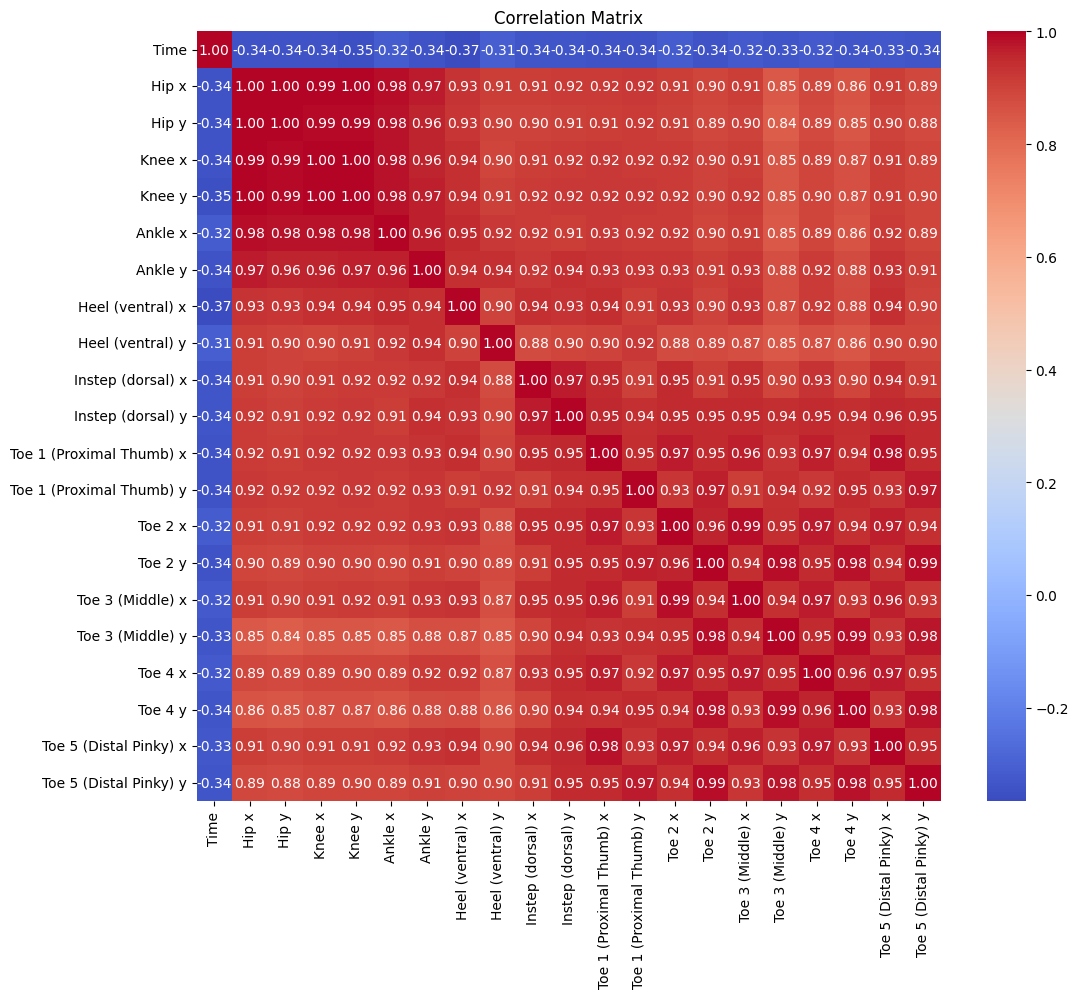

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import hdbscan
from sklearn.metrics import silhouette_score
from bayes_opt import BayesianOptimization

# --- 1. Correlation Analysis ---
# Select only numeric columns for correlation analysis, excluding 'likelihood' columns.
numeric_cols = combined_df.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('likelihood')]

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# --- 2. PCA Analysis ---
# Remove rows with NaN values
numeric_cols_pca = numeric_cols.dropna()

# Perform PCA on the numeric features.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_cols)
combined_df['PCA1'] = pca_result[:, 0]
combined_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Type', palette='Set1')
plt.title("PCA Analysis (TIS vs Biphasic)")
plt.show()

# --- 3. UMAP Analysis ---
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(numeric_cols)
combined_df['UMAP1'] = umap_result[:, 0]
combined_df['UMAP2'] = umap_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='UMAP1', y='UMAP2', hue='Type', palette='Set1')
plt.title("UMAP Analysis (TIS vs Biphasic)")
plt.show()

# --- 4. HDBSCAN Clustering with Bayesian Optimization ---
# Define an objective function that runs HDBSCAN and returns the silhouette score.
def hdbscan_silhouette(min_cluster_size, min_samples):
    # Convert parameters to integers
    min_cluster_size = int(min_cluster_size)
    min_samples = int(min_samples)
    
    # Initialize HDBSCAN with the given parameters.
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = clusterer.fit_predict(numeric_cols)
    
    # Compute silhouette score on non-noise points (labels != -1)
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(numeric_cols[mask], labels[mask])
    else:
        score = -1  # return a poor score if clustering fails
    return score

# Set up Bayesian Optimization to tune HDBSCAN parameters.
optimizer = BayesianOptimization(
    f=hdbscan_silhouette,
    pbounds={'min_cluster_size': (5, 50), 'min_samples': (1, 20)},
    random_state=42,
)
optimizer.maximize(init_points=10, n_iter=30)

best_params = optimizer.max['params']
print("Best HDBSCAN parameters found:", best_params)

# Run HDBSCAN with the optimized parameters.
best_clusterer = hdbscan.HDBSCAN(min_cluster_size=int(best_params['min_cluster_size']),
                                 min_samples=int(best_params['min_samples']))
combined_df['HDBSCAN_Cluster'] = best_clusterer.fit_predict(numeric_cols)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='UMAP1', y='UMAP2', hue='HDBSCAN_Cluster', palette='viridis')
plt.title("HDBSCAN Clustering (Optimized)")
plt.show()


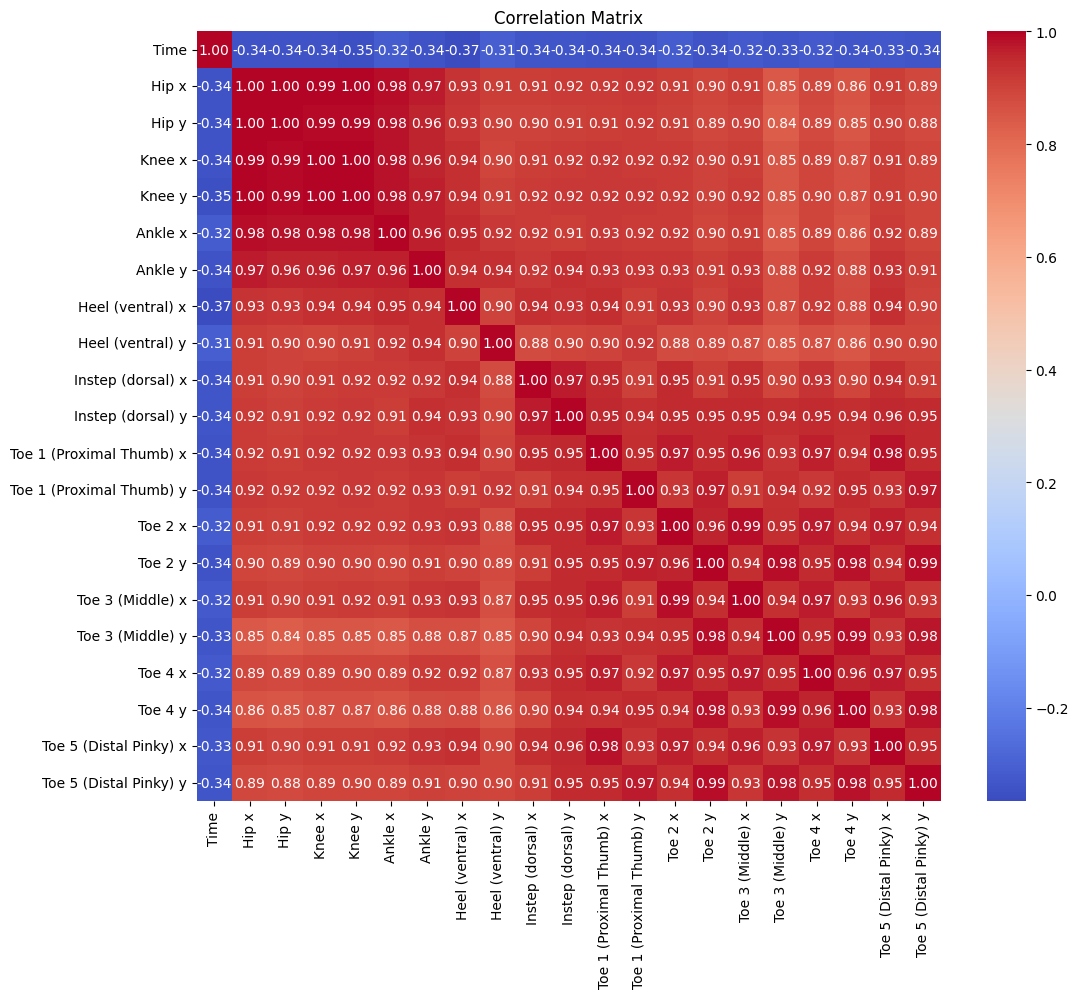

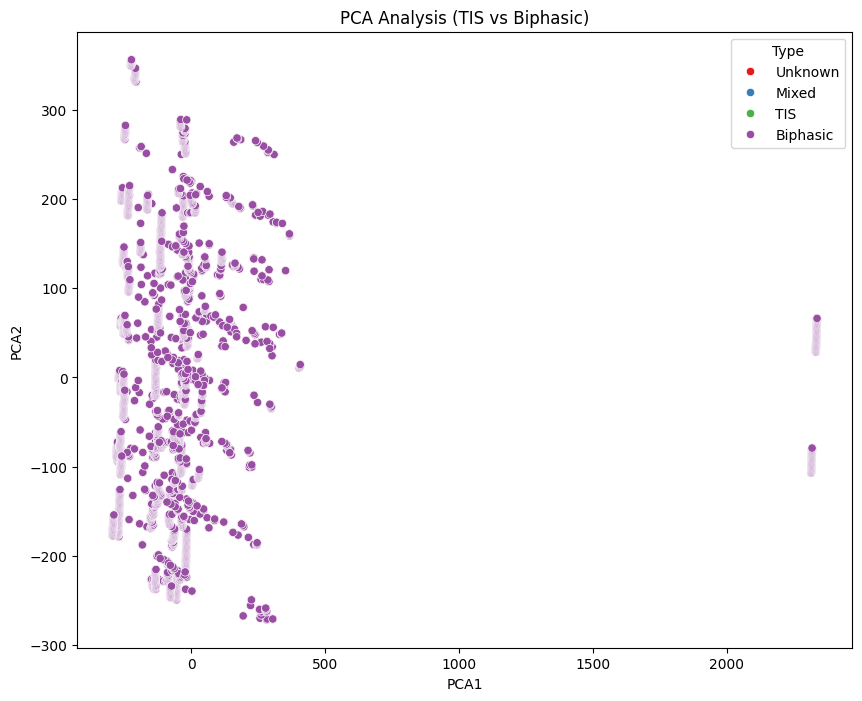

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 257 with accuracies 
[5.62174511e-15 2.05578076e-06 8.69105339e-06 7.23711834e-06]
not reaching the requested tolerance 8.150935173034668e-06.
Use iteration 257 instead with accuracy 
4.4959881251888e-06.

  _, diffusion_map = lobpcg(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-

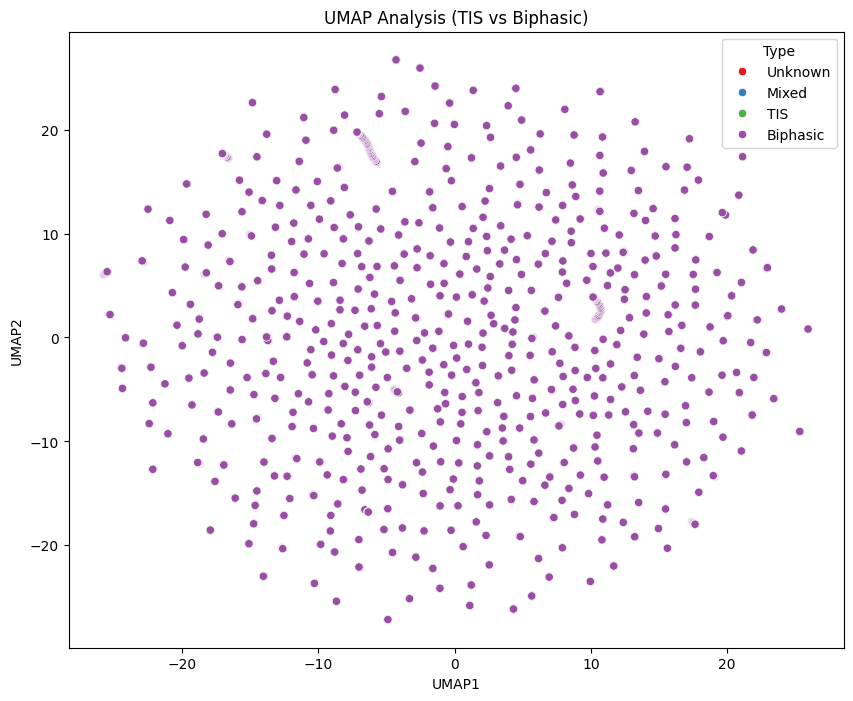

|   iter    |  target   | min_cl... | min_sa... |
-------------------------------------------------
| 1         | 0.6939    | 21.85     | 19.06     |
| 2         | 0.6443    | 37.94     | 12.37     |
| 3         | 0.6788    | 12.02     | 3.964     |
| 4         | 0.7037    | 7.614     | 17.46     |
| 5         | 0.6725    | 32.05     | 14.45     |
| 6         | 0.701     | 5.926     | 19.43     |
| 7         | 0.619     | 42.46     | 5.034     |
| 8         | 0.6553    | 13.18     | 4.485     |
| 9         | 0.6831    | 18.69     | 10.97     |
| 10        | 0.6685    | 24.44     | 6.533     |
| 11        | 0.7032    | 8.333     | 19.86     |
| 12        | 0.691     | 8.159     | 2.415     |
| 13        | 0.7017    | 12.27     | 17.14     |
| 14        | 0.7019    | 16.41     | 19.75     |
| 15        | 0.6984    | 5.31      | 11.48     |
| 16        | 0.6908    | 10.19     | 12.56     |
| 17        | 0.6299    | 49.91     | 19.96     |
| 18        | 0.6861    | 28.14     | 19.99     |


ValueError: Length of values (7940) does not match length of index (3301728)

In [18]:
# --- 1. Correlation Analysis ---
# Select only numeric columns for correlation analysis, excluding 'likelihood' columns.
numeric_cols = combined_df.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('likelihood')]

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# --- 2. PCA Analysis ---
# Remove rows with NaN values
numeric_cols_pca = numeric_cols.dropna()

# Perform PCA on the numeric features.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_cols_pca)
combined_df.loc[numeric_cols_pca.index, 'PCA1'] = pca_result[:, 0]
combined_df.loc[numeric_cols_pca.index, 'PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='Type', palette='Set1')
plt.title("PCA Analysis (TIS vs Biphasic)")
plt.show()

# --- 3. UMAP Analysis ---
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(numeric_cols_pca)
combined_df.loc[numeric_cols_pca.index, 'UMAP1'] = umap_result[:, 0]
combined_df.loc[numeric_cols_pca.index, 'UMAP2'] = umap_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='UMAP1', y='UMAP2', hue='Type', palette='Set1')
plt.title("UMAP Analysis (TIS vs Biphasic)")
plt.show()

# --- 4. HDBSCAN Clustering with Bayesian Optimization ---
# Define an objective function that runs HDBSCAN and returns the silhouette score.
def hdbscan_silhouette(min_cluster_size, min_samples):
    # Convert parameters to integers
    min_cluster_size = int(min_cluster_size)
    min_samples = int(min_samples)
    
    # Initialize HDBSCAN with the given parameters.
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
    labels = clusterer.fit_predict(numeric_cols_pca)
    
    # Compute silhouette score on non-noise points (labels != -1)
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(numeric_cols_pca[mask], labels[mask])
    else:
        score = -1  # return a poor score if clustering fails
    return score

# Set up Bayesian Optimization to tune HDBSCAN parameters.
optimizer = BayesianOptimization(
    f=hdbscan_silhouette,
    pbounds={'min_cluster_size': (5, 50), 'min_samples': (1, 20)},
    random_state=42,
)
optimizer.maximize(init_points=10, n_iter=30)

best_params = optimizer.max['params']
print("Best HDBSCAN parameters found:", best_params)

# Run HDBSCAN with the optimized parameters.
best_clusterer = hdbscan.HDBSCAN(min_cluster_size=int(best_params['min_cluster_size']),
                                 min_samples=int(best_params['min_samples']))
combined_df['HDBSCAN_Cluster'] = best_clusterer.fit_predict(numeric_cols_pca)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='UMAP1', y='UMAP2', hue='HDBSCAN_Cluster', palette='viridis')
plt.title("HDBSCAN Clustering (Optimized)")
plt.show()